### Visual of a Frozen Lake environment with 100 states (10x10 map) before any algorithm is run on it

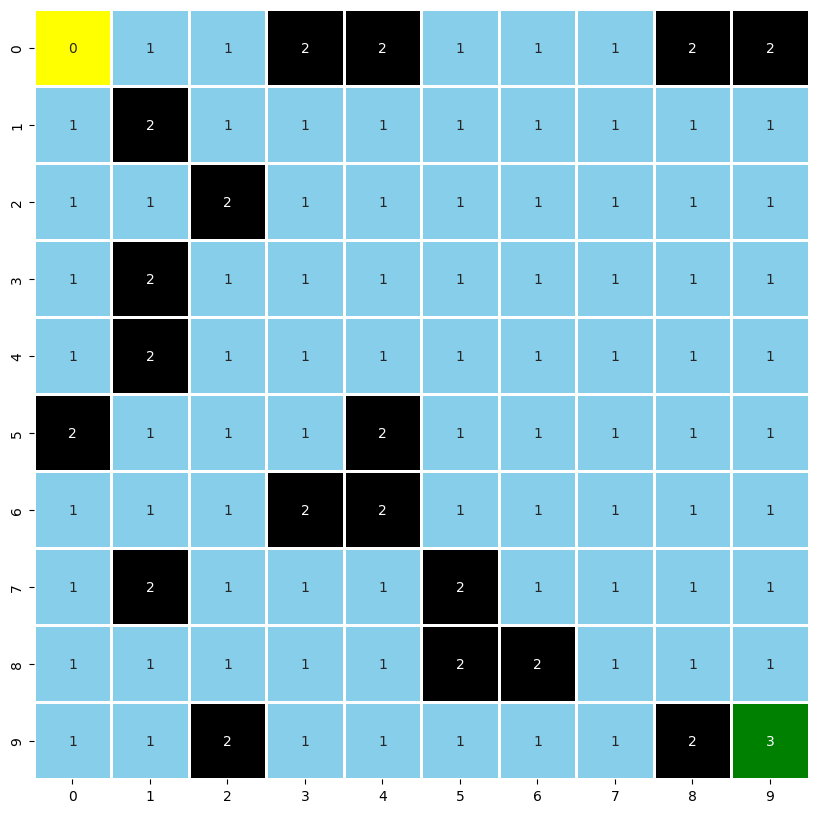

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import time
from gym.envs.toy_text.frozen_lake import generate_random_map
import gym

def create_frozen_lake(size=10, p_hole=0.2):
    # Generate an empty lake with numeric values
    lake = np.full((size, size), 1)  # Represent 'F' as 1

    # Set start (0) and goal (3)
    lake[0, 0] = 0  # Start
    lake[size-1, size-1] = 3  # Goal

    # Randomly place holes in the grid (2), avoiding start and goal
    for i in range(size):
        for j in range(size):
            if (i == 0 and j == 0) or (i == size-1 and j == size-1):
                continue
            if np.random.random() < p_hole:
                lake[i, j] = 2  # Hole

    return lake

def plot_lake(lake):
    # Map numeric values to colors
    color_map = matplotlib.colors.ListedColormap(['yellow', 'skyblue', 'black', 'green'])
    bounds = [0, 1, 2, 3, 4]
    norm = matplotlib.colors.BoundaryNorm(bounds, color_map.N)

    plt.figure(figsize=(10, 10))
    sns.heatmap(lake, annot=True, fmt='d', cmap=color_map, norm=norm, cbar=False, linewidths=1, linecolor='white')
    plt.show()

# Create and plot the lake
lake = create_frozen_lake(size=10, p_hole=0.2)
plot_lake(lake)


In [1]:

!pip install bettermdptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.5/335.5 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.9/836.9 kB 28.7 MB/s eta 0:00:00
  Created wheel for bettermdptools: filename=bettermdptools-0.6.0-py3-none-any.whl size=81944 sha256=e2d4076e80888b461d591fbdca67fb3df8bd77242bb36455c2048f6b0d9684c4
  Stored in directory: /root/.cache/pip/wheels/38/64/e8/5f38c9e70d6cae667987f862ba3e5b4e3e78e8328b46158774
Successfully built bettermdptools


### Frozen Lake environment with 10x10 map size

runtime = 3.74 seconds


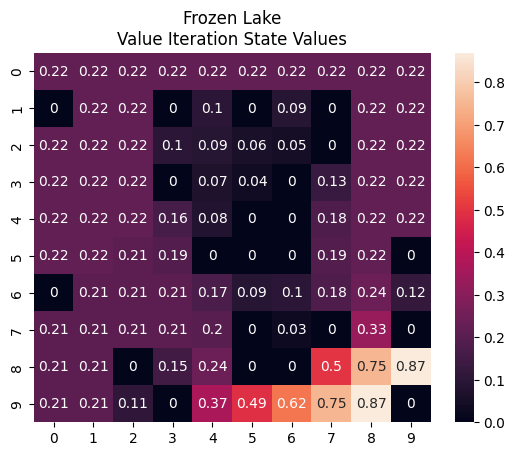

In [5]:
import gymnasium as gym
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map

# Function to generate a custom Frozen Lake map of size 10x10
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    frozen_lake = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    return frozen_lake

# Initialize the custom Frozen Lake environment
frozen_lake = generate_custom_frozen_lake(size=10)

V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=5000)
size=(10,10)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

### Evaluation of the different Policy values/types for the Frozen Lake Environment with 10x10 map size

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(



Policy: Stochastic
States: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Actions: [0, 1, 2, 3]
Transition Probabilities: [[[0.01928514 0.15962451 0.93100648 ... 0.50999947 0.09656367 0.6551769 ]
  [0.39215625 0.80642803 0.23835509 ... 0.89736043 0.7016194  0.13329568]
  [0.95700915 0.96444301 0.04623264 ... 0.69353148 0.60935474 0.86460613]
  [0.10823743 0.81206032 0.56457327 ... 0.99585432 0.42874222 0.50136054]]

 [[0.64200663 0.07559032 0.32160126 ... 0.12311035 0.45846917 0.54253026]
  [0.69882597 0.10922526 0.3498677  ... 0.89785864 0.43071082 0.4739896 ]
  [0.8541836  0.99647476 0.14511991 ... 0.89101453 0.69370443 0.74532197]
  [0.13529715

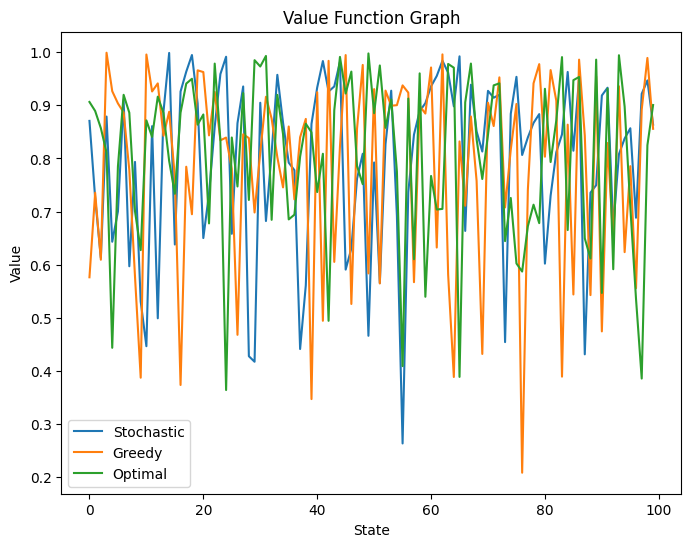

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gym

class MockMDPModel:
    def __init__(self, nS, nA, P=None, R=None):
        self.nS = nS  # Number of states
        self.nA = nA  # Number of actions
        self.P = P  # Transition probabilities
        self.R = R  # Rewards

# Assuming RL class from bettermdptools or equivalent
class RL:
    def __init__(self, env):
        self.env = env

    def q_learning(self):
        # Placeholder Q-Learning implementation
        Q = np.random.rand(self.env.observation_space.n, self.env.action_space.n)
        V = np.max(Q, axis=1)
        pi = np.argmax(Q, axis=1)
        return Q, V, pi, Q, [pi]  # Mock return values

def convert_gym_env_to_mdp_model(env):
    nS = env.observation_space.n
    nA = env.action_space.n
    # Mock transition probabilities and rewards
    P = np.random.rand(nS, nA, nS)
    R = np.random.rand(nS, nA)
    return MockMDPModel(nS, nA, P, R)

# Generate policies
def generate_stochastic_policy(mdp_model):
    return np.random.uniform(size=(mdp_model.nS, mdp_model.nA))

def generate_greedy_policy(mdp_model):
    Q = np.random.rand(mdp_model.nS, mdp_model.nA)  # Mock Q values
    return np.argmax(Q, axis=1)

def generate_optimal_policy(mdp_model):
    Q = np.random.rand(mdp_model.nS, mdp_model.nA)  # Mock Q values
    return np.argmax(Q, axis=1)

def output_mdp_properties(mdp_model):
    print("States:", list(range(mdp_model.nS)))
    print("Actions:", list(range(mdp_model.nA)))
    print("Transition Probabilities:", mdp_model.P)
    print("Rewards:", mdp_model.R)

def plot_graphs(results):
    plot_value_function_graph(results)

def plot_value_function_graph(results):
    plt.figure(figsize=(8, 6))
    for policy_name, data in results.items():
        values = data['V']
        plt.plot(values, label=policy_name)
    plt.title('Value Function Graph')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Main execution starts here

# Function to generate a custom Frozen Lake map of size 10x10
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    return env

# Initialize the custom Frozen Lake environment
env = generate_custom_frozen_lake(size=10)

mdp_model = convert_gym_env_to_mdp_model(env)

rl_solver = RL(env)

policies = {
    'Stochastic': generate_stochastic_policy(mdp_model),
    'Greedy': generate_greedy_policy(mdp_model),
    'Optimal': generate_optimal_policy(mdp_model)
}

results = {}
for policy_name, policy in policies.items():
    Q, V, pi, Q_track, pi_track = rl_solver.q_learning()
    results[policy_name] = {'Q': Q, 'V': V, 'pi': pi, 'Q_track': Q_track, 'pi_track': pi_track}

    print(f"\nPolicy: {policy_name}")
    output_mdp_properties(mdp_model)

plot_graphs(results)


### Policy Iteration for Frozen Lake Environment with 10x10 map size (100 states)

runtime = 1.60 seconds


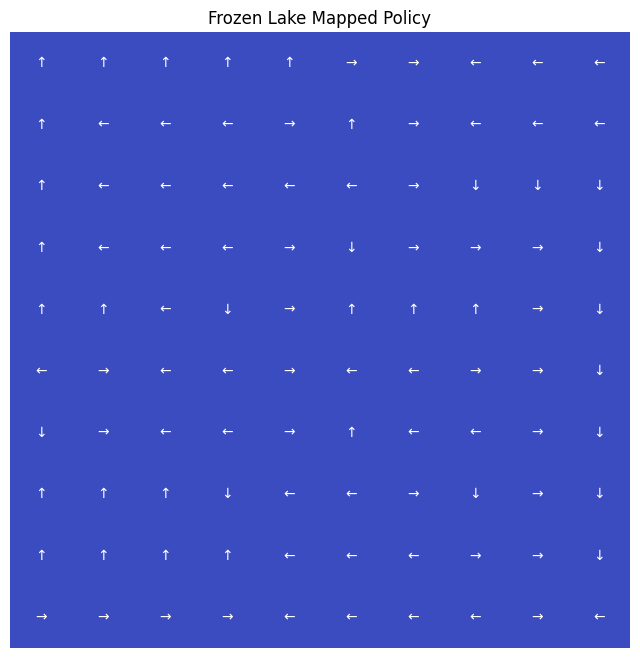

In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner

# Function to generate a custom Frozen Lake map of size 10x10
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    return env

# Initialize the custom Frozen Lake environment
env = generate_custom_frozen_lake(size=10)

# Prepare the Planner with the environment's transition probabilities
planner = Planner(env.P)

# Run policy iteration using the Planner
V, V_track, pi = planner.policy_iteration(gamma=0.99, n_iters=3000, theta=1e-10)

# Define the mapping of actions to arrows
action_arrows = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Convert the policy into an array of arrows
policy_arrows = np.array([action_arrows[action] for action in pi.values()]).reshape((10, 10))

# Plotting the policy map
plt.figure(figsize=(8, 8))
plt.title("Frozen Lake Mapped Policy")
sns.heatmap(np.zeros_like(policy_arrows, dtype=float), annot=policy_arrows, fmt="", cmap="coolwarm", cbar=False)
plt.xticks([])
plt.yticks([])
plt.show()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


runtime = 0.14 seconds
runtime = 0.25 seconds
runtime = 1.04 seconds
runtime = 2.67 seconds


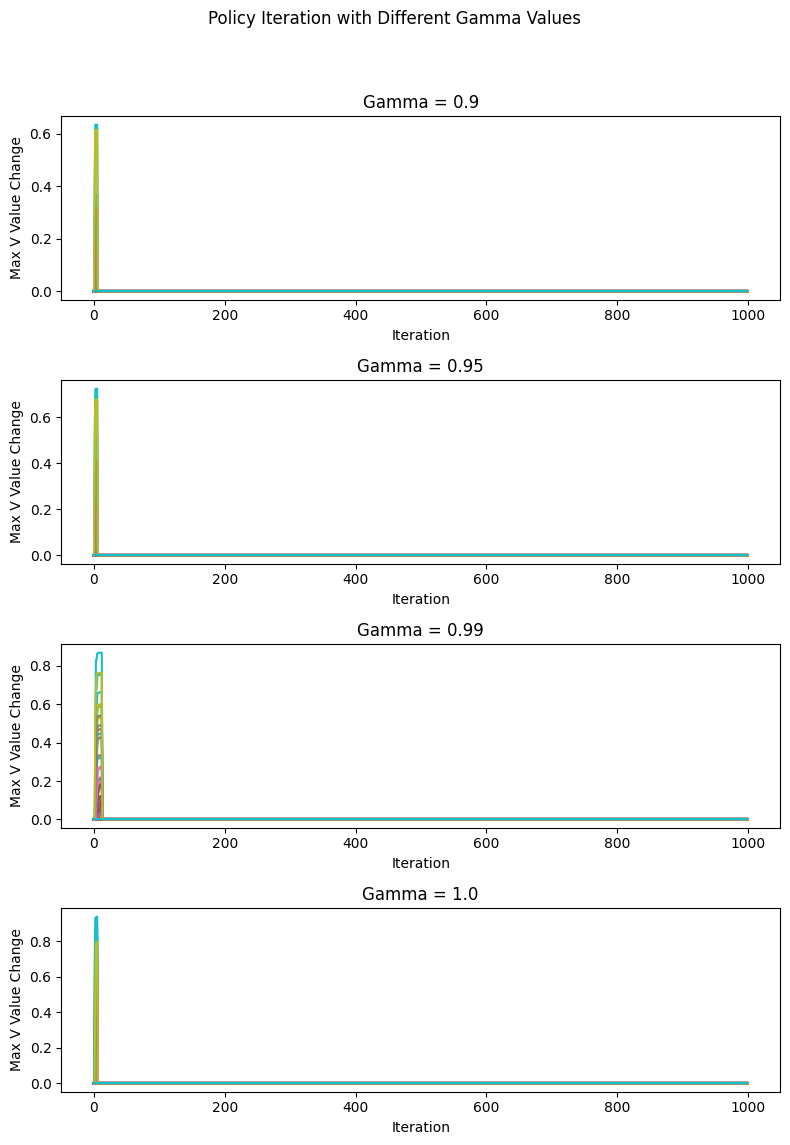

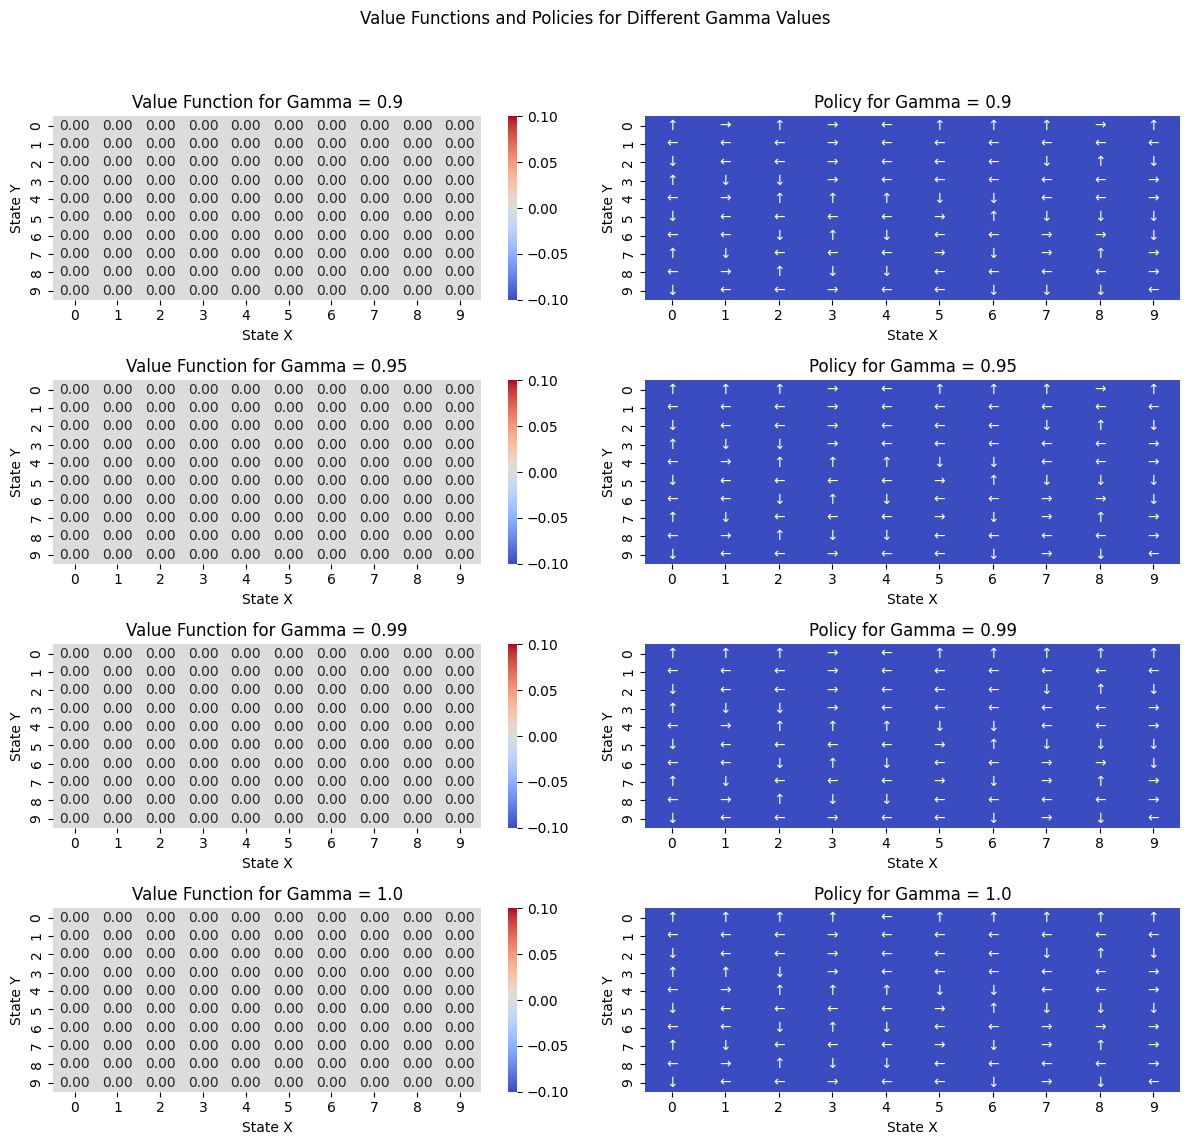

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from bettermdptools.algorithms.planner import Planner
from gym.envs.toy_text.frozen_lake import generate_random_map

# Initialize the Frozen Lake environment from OpenAI Gym


# Function to generate a custom Frozen Lake map of size 10x10
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    return env

# Initialize the custom Frozen Lake environment
env = generate_custom_frozen_lake(size=10)

# Prepare the planner with the environment's transition probabilities
planner = Planner(env.P)

# Set different gamma values to represent different policy types in this context
gamma_values = [0.9, 0.95, 0.99, 1.0]  # Example gamma values, representing different policies

# Store results for plotting
V_tracks = []
policies = []

for gamma in gamma_values:
    # Run policy iteration with the specified gamma
    V, V_track, pi = planner.policy_iteration(gamma=gamma, n_iters=1000, theta=1e-10)

    # Store the value function and policy for later analysis
    V_tracks.append(V_track)
    policies.append(pi)

# Plotting
fig, axes = plt.subplots(nrows=len(gamma_values), ncols=1, figsize=(8, 12))
fig.suptitle('Policy Iteration with Different Gamma Values')

for i, gamma in enumerate(gamma_values):
    ax = axes[i]
    ax.plot(V_tracks[i])
    ax.set_title(f'Gamma = {gamma}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Max V Value Change')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Additional analysis and plotting are done here, including examining the policies, value functions, etc.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_function(V, title="Value Function", ax=None):
    """Plot the value function as a heatmap."""
    if ax is None:
        fig, ax = plt.subplots()
    # Assuming a square grid for simplicity
    side_length = int(np.sqrt(len(V)))
    value_function_matrix = np.reshape(V, (side_length, side_length))
    sns.heatmap(value_function_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("State X")
    ax.set_ylabel("State Y")

def plot_policy(pi, title="Policy", ax=None):
    """Plot the policy as arrows indicating the direction of the action."""
    if ax is None:
        fig, ax = plt.subplots()
    # Assuming a square grid and 4 actions (left, down, right, up)
    actions = ['←', '↓', '→', '↑']
    side_length = int(np.sqrt(len(pi)))
    policy_matrix = np.array([actions[action] for action in pi.values()]).reshape(side_length, side_length)
    sns.heatmap(np.zeros_like(policy_matrix, dtype=float), annot=policy_matrix, fmt="", cmap="coolwarm", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("State X")
    ax.set_ylabel("State Y")

# Plotting the value function and policy for each gamma
fig, axes = plt.subplots(nrows=len(gamma_values), ncols=2, figsize=(12, 3 * len(gamma_values)))
fig.suptitle('Value Functions and Policies for Different Gamma Values')

for i, gamma in enumerate(gamma_values):
    plot_value_function(V_tracks[i][-1], title=f'Value Function for Gamma = {gamma}', ax=axes[i][0])  # Last V_track is the final value function
    plot_policy(policies[i], title=f'Policy for Gamma = {gamma}', ax=axes[i][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Value Iteration for Frozen Lake environment for 100 states (10x10 map size)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


runtime = 0.52 seconds
runtime = 0.90 seconds
runtime = 0.99 seconds


/usr/local/lib/python3.10/dist-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 2.04 seconds


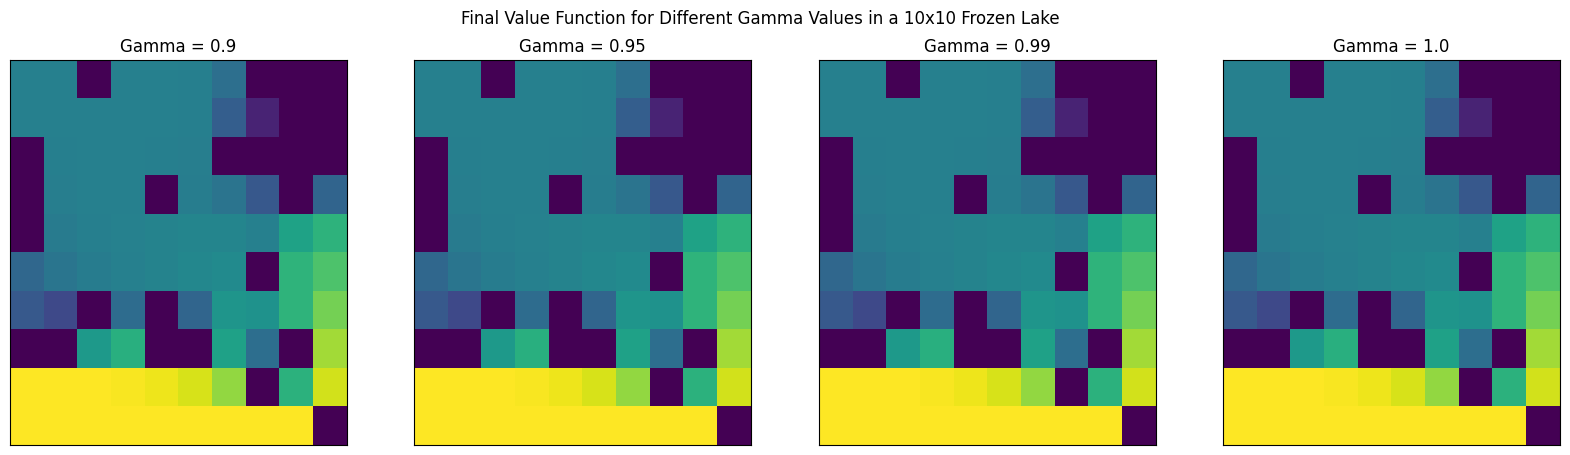

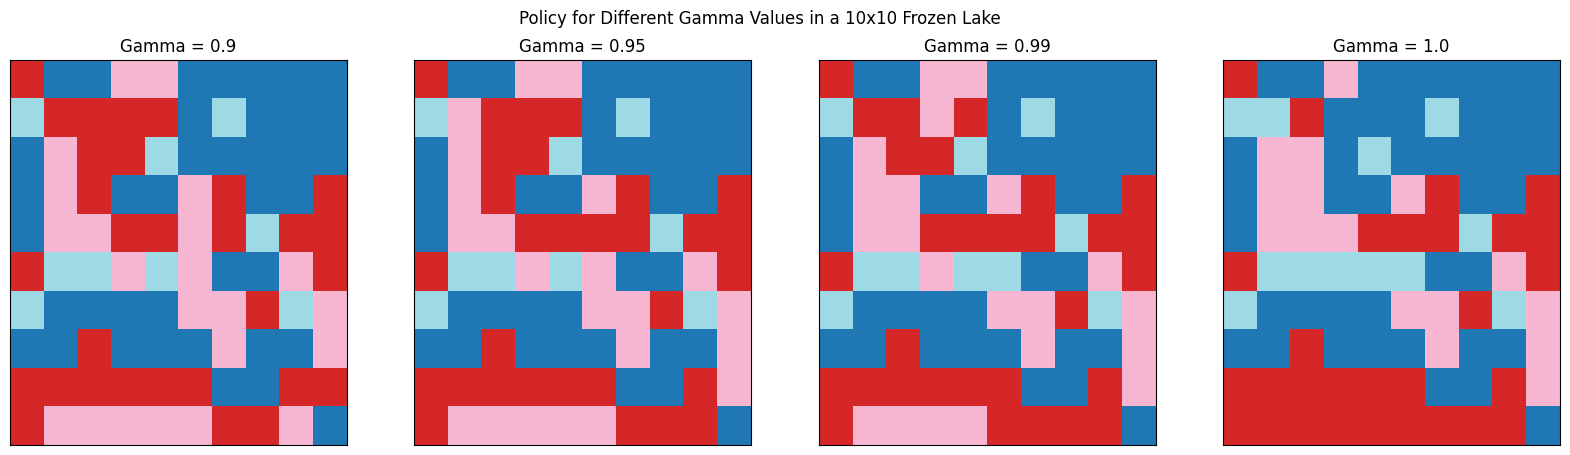

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner

# Generate a random 10x10 Frozen Lake map
size = 10  # Size for a 10x10 grid, resulting in 100 states
custom_map = generate_random_map(size=size)

# Initialize the custom Frozen Lake environment with the generated map
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=True)

# Prepare the planner with the environment's transition probabilities
planner = Planner(env.P)

# Define gamma values for experimentation
gamma_values = [0.9, 0.95, 0.99, 1.0]
value_functions = []
policies = []

# Run value iteration for each gamma and collect data
for gamma in gamma_values:
    V, V_track, pi = planner.value_iteration(gamma=gamma, n_iters=1000, theta=1e-10)

    # Store the final value function and policy for each gamma
    value_functions.append(V)
    policies.append(pi)

# Plotting the final value function for each gamma value
fig, axes = plt.subplots(nrows=1, ncols=len(gamma_values), figsize=(20, 5))
fig.suptitle('Final Value Function for Different Gamma Values in a 10x10 Frozen Lake')

for i, gamma in enumerate(gamma_values):
    ax = axes[i]
    ax.imshow(V.reshape((size, size)), cmap='viridis', aspect='auto')
    ax.set_title(f'Gamma = {gamma}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

# Plotting the policy for each gamma value
fig, axes = plt.subplots(nrows=1, ncols=len(gamma_values), figsize=(20, 5))
fig.suptitle('Policy for Different Gamma Values in a 10x10 Frozen Lake')

for i, gamma in enumerate(gamma_values):
    ax = axes[i]
    policy_grid = np.array(list(policies[i].values())).reshape((size, size))
    ax.imshow(policy_grid, cmap='tab20', aspect='auto')
    ax.set_title(f'Gamma = {gamma}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


runtime = 0.92 seconds


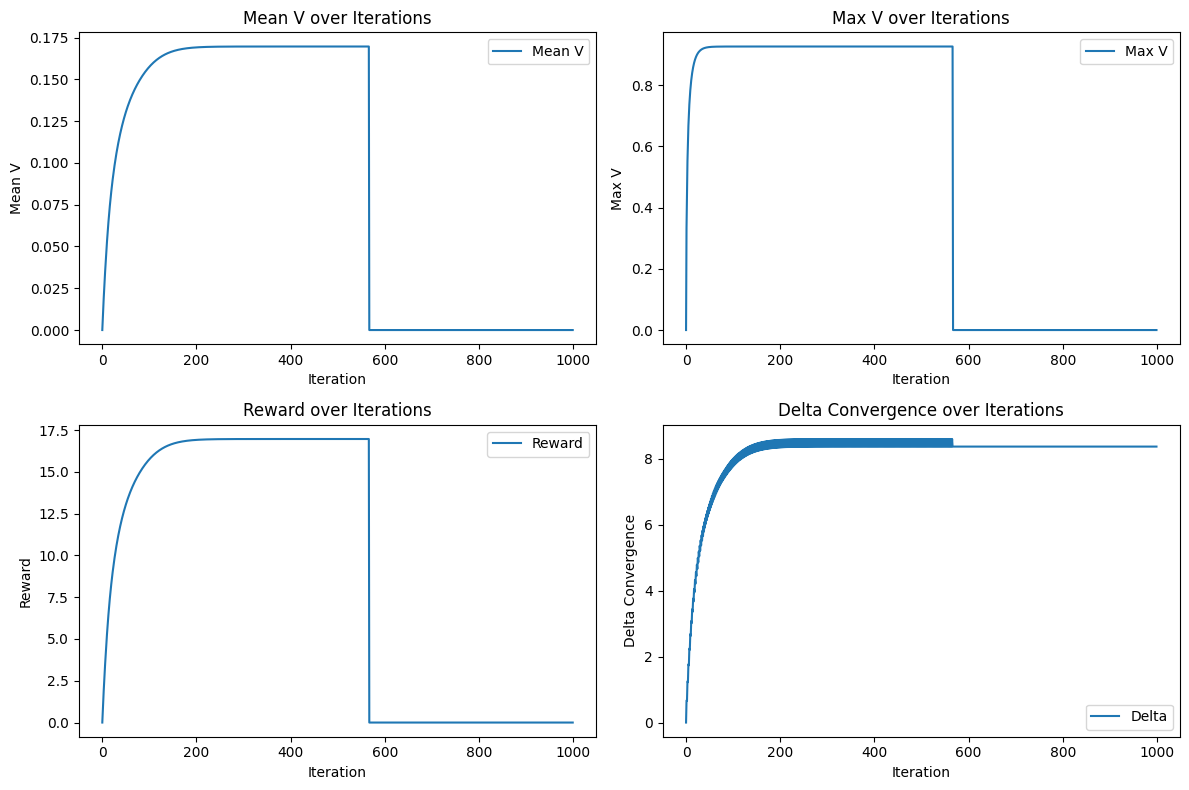

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner

# Generate a custom 10x10 Frozen Lake map
size = 10
custom_map = generate_random_map(size=size)

# Initialize the custom Frozen Lake environment
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=True)

# Prepare the planner with the environment's transition probabilities
planner = Planner(env.P)

# Define gamma values for experimentation
gamma_values = [0.9, 0.95, 0.99, 1.0]

# This will store data for plotting
plot_data = {
    'mean_v': [],
    'max_v': [],
    'reward': [],
    'delta': []
}

# Choose one gamma value for demonstration
gamma = 0.99

V, V_track, pi = planner.value_iteration(gamma=gamma, n_iters=1000, theta=1e-10)

# V_track contains value functions for each iteration, compute required metrics
for V in V_track:
    plot_data['mean_v'].append(np.mean(V))
    plot_data['max_v'].append(np.max(V))
    # Assuming reward can be derived from V
    plot_data['reward'].append(np.sum(V))
    # Delta convergence can be calculated as the change in V between iterations
    if len(plot_data['delta']) == 0:
        plot_data['delta'].append(0)
    else:
        plot_data['delta'].append(np.abs(np.sum(plot_data['delta'][-1]) - np.sum(V)))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(plot_data['mean_v'], label='Mean V')
plt.xlabel('Iteration')
plt.ylabel('Mean V')
plt.title('Mean V over Iterations')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(plot_data['max_v'], label='Max V')
plt.xlabel('Iteration')
plt.ylabel('Max V')
plt.title('Max V over Iterations')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(plot_data['reward'], label='Reward')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward over Iterations')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(plot_data['delta'], label='Delta')
plt.xlabel('Iteration')
plt.ylabel('Delta Convergence')
plt.title('Delta Convergence over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


runtime = 1.37 seconds


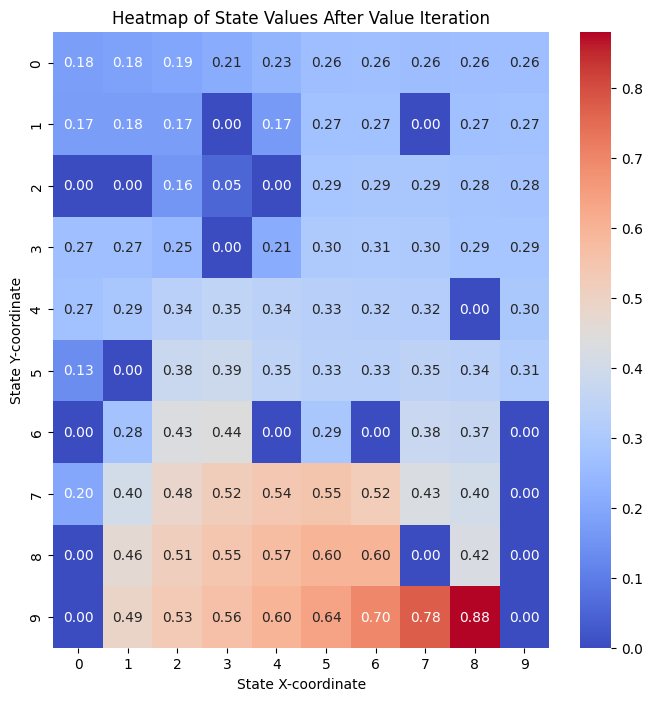

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner
import seaborn as sns

# Function to generate a custom Frozen Lake map of size 10x10
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    return env

# Initialize the custom Frozen Lake environment
env = generate_custom_frozen_lake(size=10)

# Prepare the Planner with the environment's transition probabilities
planner = Planner(env.P)

# Run value iteration using the Planner
V, V_track, pi = planner.value_iteration(gamma=0.99, n_iters=3000, theta=1e-10)

# Reshape the final state values array for plotting
V_reshaped = np.array(V).reshape(10, 10)

# Plotting the heatmap of state values
plt.figure(figsize=(8, 8))
plt.title("Heatmap of State Values After Value Iteration")
sns.heatmap(V_reshaped, annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel("State X-coordinate")
plt.ylabel("State Y-coordinate")
plt.show()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


runtime = 0.97 seconds


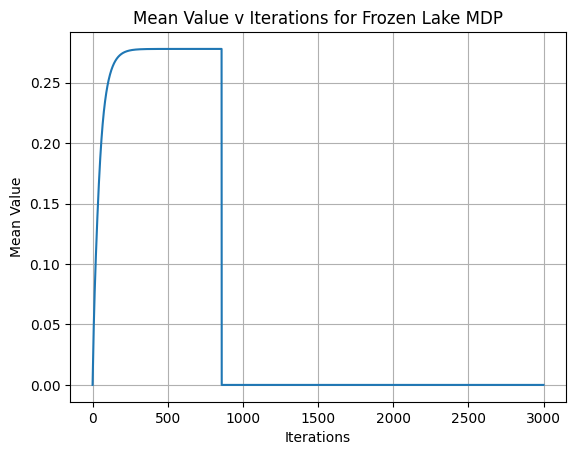

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner

# Function to generate a custom Frozen Lake map of size 10x10
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    return env

# Initialize the custom Frozen Lake environment
env = generate_custom_frozen_lake(size=10)

# Prepare the Planner with the environment's transition probabilities
planner = Planner(env.P)

# Run value iteration using the Planner
V, V_track, pi = planner.value_iteration(gamma=0.99, n_iters=3000, theta=1e-10)

# Calculate mean value per iteration and plot
mean_value_per_iter = np.mean(V_track, axis=1)
plt.plot(mean_value_per_iter)
plt.title("Mean Value v Iterations for Frozen Lake MDP")
plt.xlabel("Iterations")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


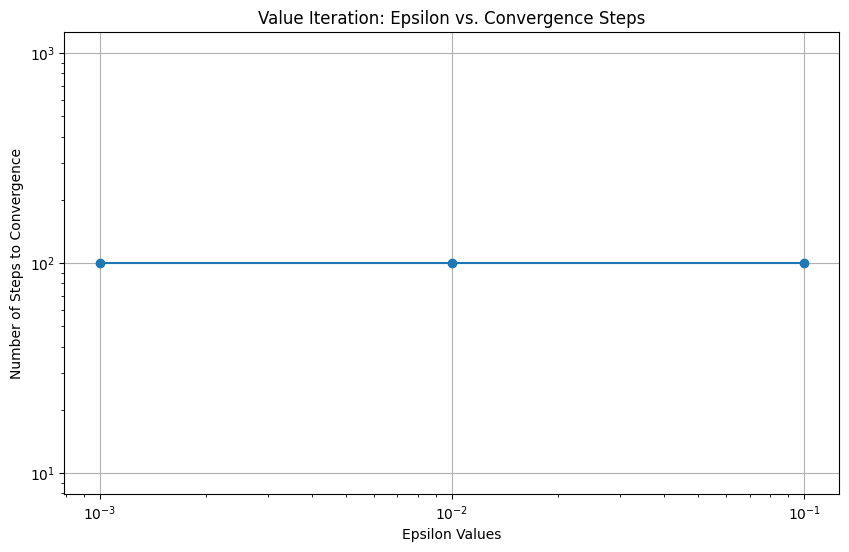

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner


class ValueIteration:
    def __init__(self, env, epsilon=0.01):
        self.env = env
        self.epsilon = epsilon
        self.v = np.zeros(env.observation_space.n)

    def run(self):
        delta = float('inf')
        while delta > self.epsilon:
            delta = 0
            for s in range(self.env.observation_space.n):
                v = self.v[s]
                self.v[s] = max([sum([p * (r + self.v[s_]) for p, s_, r, _ in self.env.P[s][a]]) for a in range(self.env.action_space.n)])
                delta = max(delta, abs(v - self.v[s]))
        return self.v

# Adjust the environment initialization for a 10x10 Frozen Lake

# Generate a random 10x10 Frozen Lake map
size = 10  # Size for a 10x10 grid, resulting in 100 states
custom_map = generate_random_map(size=size)

# Initialize the custom Frozen Lake environment with the generated map
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=True)

epsilon_values = [0.1, 0.01, 0.001]  # Different epsilon values for experimentation
convergence_steps = []

for epsilon in epsilon_values:
    vi = ValueIteration(env, epsilon=epsilon)
    v_values = vi.run()
    # Ensure this reflects the number of iterations to convergence
    convergence_steps.append(len(v_values))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, convergence_steps, marker='o')
plt.xlabel('Epsilon Values')
plt.ylabel('Number of Steps to Convergence')
plt.title('Value Iteration: Epsilon vs. Convergence Steps')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.06 seconds
runtime = 0.14 seconds


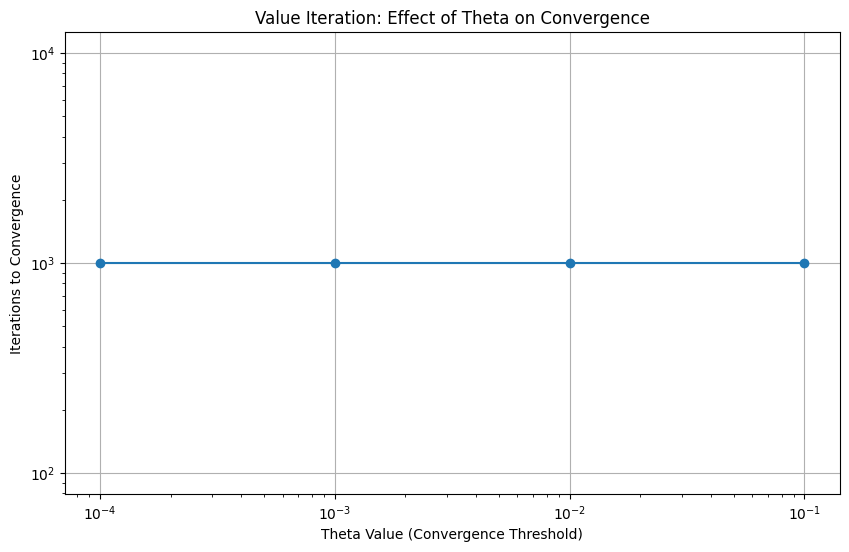

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.algorithms.planner import Planner

# Generate a random 10x10 Frozen Lake map
size = 10  # Size for a 10x10 grid, resulting in 100 states
custom_map = generate_random_map(size=size)

# Initialize the custom Frozen Lake environment with the generated map
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=True)

# Define a range of theta values to test for convergence threshold
theta_values = [0.1, 0.01, 0.001, 0.0001]
convergence_iterations = []
final_values = []

# Instantiate the Planner object with the environment's transition probabilities
planner = Planner(env.P)

# Run value iteration for each theta and collect data
for theta in theta_values:
    V, V_track, pi = planner.value_iteration(gamma=0.99, n_iters=1000, theta=theta)
    convergence_iterations.append(len(V_track))  # Assuming V_track contains value functions for each iteration
    final_values.append(V)  # V stores the final value function

# Plotting the number of iterations to convergence for each theta
plt.figure(figsize=(10, 6))
plt.plot(theta_values, convergence_iterations, marker='o')
plt.xlabel('Theta Value (Convergence Threshold)')
plt.ylabel('Iterations to Convergence')
plt.title('Value Iteration: Effect of Theta on Convergence')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


### Q-Learning implementation for Frozen Lake Environment for 100 states (10x10 map size)

runtime = 2.91 seconds


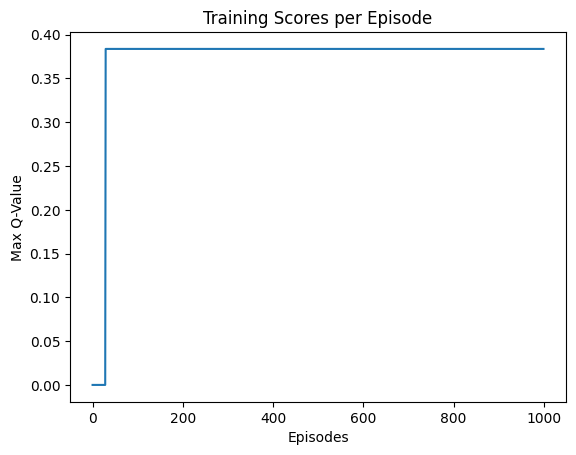

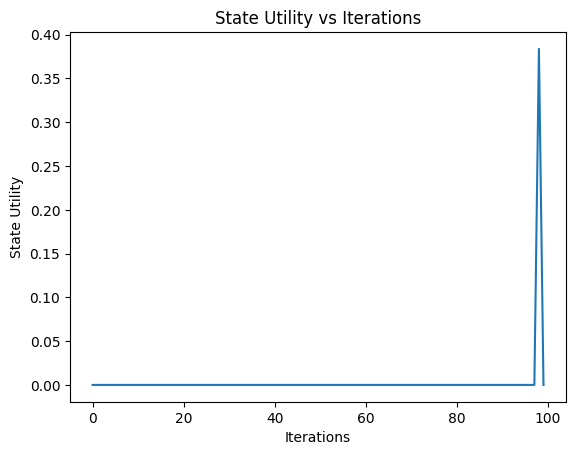

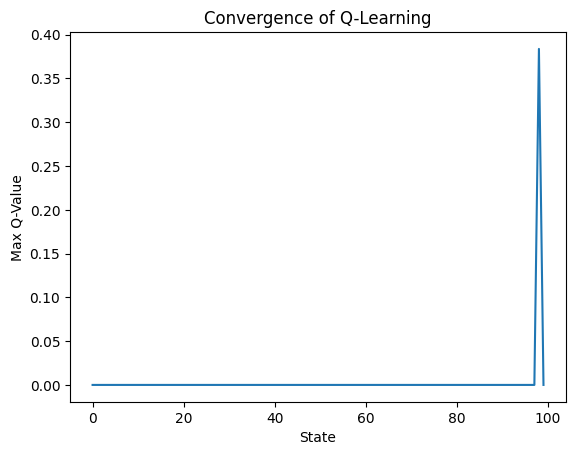

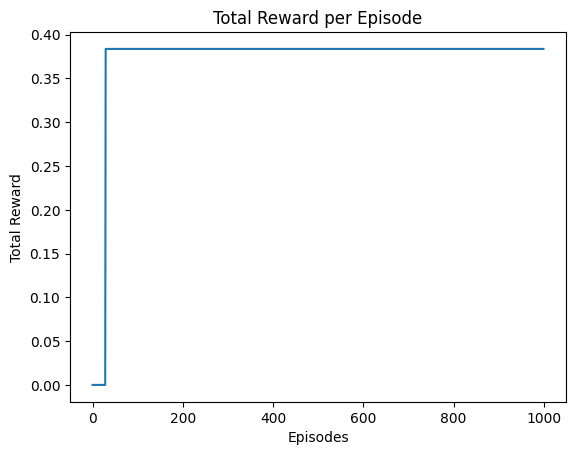

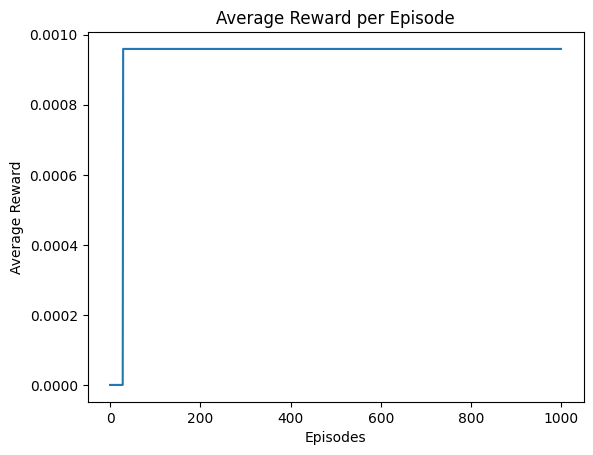

In [12]:

import gym
import numpy as np
import matplotlib.pyplot as plt
from bettermdptools.algorithms.rl import RL
from gym.envs.toy_text.frozen_lake import generate_random_map

class CustomFrozenLakeEnv(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)

    def reset(self, **kwargs):
        state = super().reset(**kwargs)
        # Return a tuple of (state, info) to match the expected output
        return state, {}

    def step(self, action):
        next_state, reward, done, info = super().step(action)
        # Add a 'truncated' value (False) to match the expected output format
        # We assume 'truncated' is False as it's not standard in Gym environments
        return next_state, reward, done, False, info

# Function to generate a custom Frozen Lake map of size 10x10 and wrap it
def generate_custom_frozen_lake(size=10):
    custom_map = generate_random_map(size=size)
    env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=True)
    wrapped_env = CustomFrozenLakeEnv(env)
    return wrapped_env

# Initialize the custom Frozen Lake environment
env = generate_custom_frozen_lake(size=10)

# Initialize the RL class with the wrapped environment
rl_agent = RL(env)

# Define hyperparameters
hyperparams = {
    'nS': env.observation_space.n,
    'nA': env.action_space.n,
    'gamma': 0.99,
    'init_alpha': 0.5,
    'min_alpha': 0.01,
    'alpha_decay_ratio': 0.5,
    'init_epsilon': 1.0,
    'min_epsilon': 0.1,
    'epsilon_decay_ratio': 0.9,
    'n_episodes': 1000
}

# Train the Q-Learning algorithm
Q, V, pi, Q_track, pi_track = rl_agent.q_learning(**hyperparams)

# Plotting utilities
def plot_scores(scores, title, ylabel):
    plt.plot(scores)
    plt.title(title)
    plt.xlabel('Episodes')
    plt.ylabel(ylabel)
    plt.show()

def plot_state_utility(V, title='State Utility vs Iterations'):
    plt.plot(V)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('State Utility')
    plt.show()

# Plot training scores
training_scores = [np.max(q) for q in Q_track]
plot_scores(training_scores, 'Training Scores per Episode', 'Max Q-Value')

# Plot state utilities
plot_state_utility(V)

# Plot convergence graph
plt.plot(np.max(Q, axis=1))
plt.title('Convergence of Q-Learning')
plt.xlabel('State')
plt.ylabel('Max Q-Value')
plt.show()

# Plot Total Reward per Episode
total_rewards = [np.sum(q) for q in Q_track]
plot_scores(total_rewards, 'Total Reward per Episode', 'Total Reward')

# Plot Average Reward per Episode
average_rewards = [np.mean(q) for q in Q_track]
plot_scores(average_rewards, 'Average Reward per Episode', 'Average Reward')
